In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import nltk
import sklearn
import seaborn as sns

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_table('SMSSpamCollection', header = None)
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.rename(columns={0 : 'label', 1 : 'text'}, inplace=True)

In [4]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
classes = data['label']
classes.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

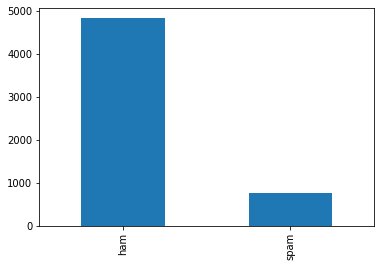

In [6]:
data['label'].value_counts().plot(kind = 'bar')
plt.show()

# EDA

In this,

->we will convert the classes (spam/ham) into binary values (1/0)

->remove punctuations and convert string to lowercase

->remove stop words

### Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['spam'] = encoder.fit_transform(classes)
data.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
data.head(20)

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


### Punctuation

In [9]:
#We use the punctuation list from the string library:

import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### StopWords

Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text,
and which may be removed to avoid them being construed as signal for prediction.

Due to the known issues in the ’english’ stop word list of sklearn, we use the stopwords from NLTK:

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

In [11]:
def remove_punctuations_and_stopwords(text):

    punct_removed = [ch.lower() for ch in text if ch not in string.punctuation]
    punct_removed = "".join(punct_removed).split()
    
    stopwrds_removed = [lem.lemmatize(word) for word in punct_removed if word not in stopwords.words("english")]
    return stopwrds_removed

data['text'].apply(remove_punctuations_and_stopwords).head(20)

0     [go, jurong, point, crazy, available, bugis, n...
1                        [ok, lar, joking, wif, u, oni]
2     [free, entry, 2, wkly, comp, win, fa, cup, fin...
3         [u, dun, say, early, hor, u, c, already, say]
4     [nah, dont, think, go, usf, life, around, though]
5     [freemsg, hey, darling, 3, week, word, back, i...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, melle, melle, oru, minnaminungi...
8     [winner, valued, network, customer, selected, ...
9     [mobile, 11, month, u, r, entitled, update, la...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chance, win, cash, 100, 20000, pound, tx...
12    [urgent, 1, week, free, membership, £100000, p...
13    [ive, searching, right, word, thank, breather,...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                  [oh, kim, watching]
17    [eh, u, remember, 2, spell, name, yes, v, 

In [12]:
data['text'][:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

### Top 30 words in ham and spam messages

In [12]:
data_ham = data[data['spam'] == 0]
data_spam = data[data['spam'] == 1]

In [13]:
data_ham.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
6,ham,Even my brother is not like to speak with me. ...,0


In [14]:
data_ham.loc[:, 'text'] = data_ham['text'].apply(remove_punctuations_and_stopwords)
word_data_ham = data_ham['text'].tolist()

data_spam.loc[:, 'text'] = data_spam['text'].apply(remove_punctuations_and_stopwords)
word_data_spam = data_spam['text'].tolist()

In [15]:
print(type(word_data_ham))
word_data_ham[:5]

<class 'list'>


[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']]

In [16]:
list_ham_words = []

for sublist in word_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [17]:
list_spam_words = []

for sublist in word_data_spam:
    for item in sublist:
        list_spam_words.append(item)

### Collections: Counter

In [18]:
from collections import Counter

In [19]:
c_ham = Counter(list_ham_words)
c_spam = Counter(list_spam_words)

df_ham_top_30_words = pd.DataFrame(c_ham.most_common(30), columns=['word', 'count'])
df_spam_top_30_words = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

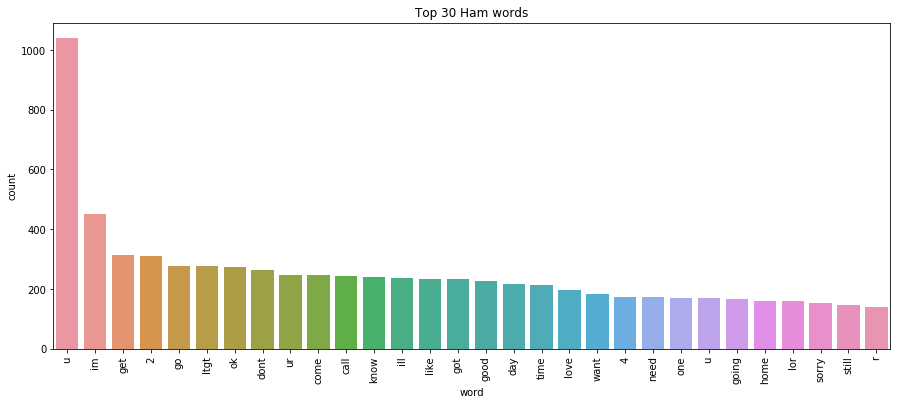

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'word', 
            y = 'count',
            data = df_ham_top_30_words)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical')
plt.show()

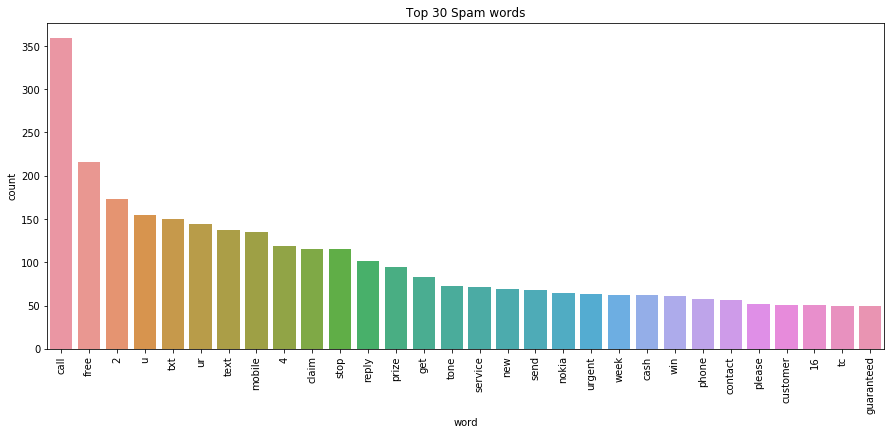

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'word', 
            y = 'count',
            data = df_spam_top_30_words)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical')
plt.show()

### NLTK FreqDist

In [22]:
f_ham = nltk.FreqDist(list_ham_words)
f_spam = nltk.FreqDist(list_spam_words)

df_ham_top_30_words = pd.DataFrame(f_ham.most_common(30), columns=['word', 'count'])
df_spam_top_30_words = pd.DataFrame(f_spam.most_common(30), columns=['word', 'count'])

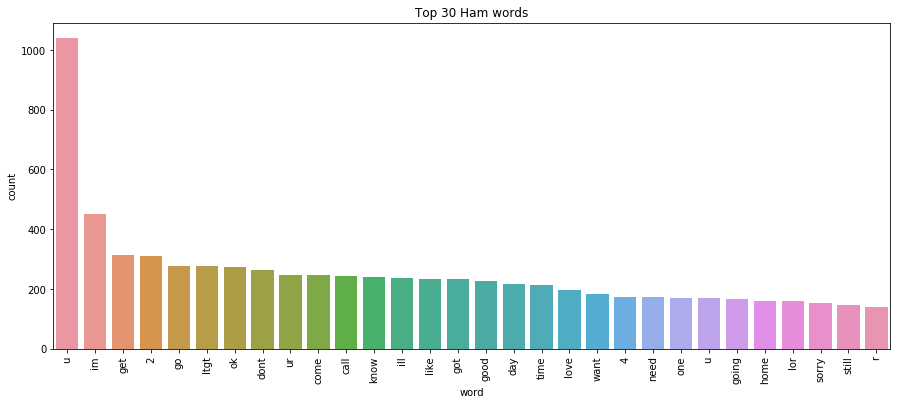

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'word', 
            y = 'count',
            data = df_ham_top_30_words)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical')
plt.show()

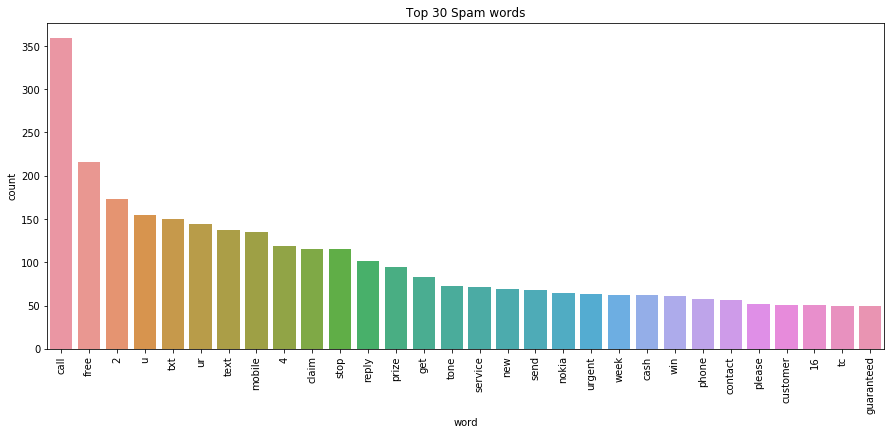

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'word', 
            y = 'count',
            data = df_spam_top_30_words)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical')
plt.show()

### Bag Of Words with Count Vectorizer

The process of converting NLP text into numbers is called vectorization in ML.

CountVectorizer works on Terms Frequency, i.e. counting the occurrences of tokens and building a sparse matrix of documents x tokens.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=remove_punctuations_and_stopwords)

bow_matrix = cv.fit_transform(data['text'])

In [26]:
bow_matrix.shape

(5572, 9001)

### Term frequency inverse document frequency - TFIDF

Occurrence count is a good start but there is an issue: longer documents will have higher average count values
than shorter documents, even though they might talk about the same topics.
To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document
by the total number of words in the document: these new features are called tf for Term Frequencies.
Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are
therefore less informative than those that occur only in a smaller portion of the corpus.
This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

Term Frequency (TF): is a scoring of the frequency of the word in the current document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. The term frequency is often divided by the document length to normalize.

Inverse Document Frequency (IDF): is a scoring of how rare the word is across documents. IDF is a measure of how rare a term is. Rarer the term, more is the IDF score.


TF-IDF score = TF * IDF

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tf_idf_data = tfidf_transformer.fit_transform(bow_matrix)

In [28]:
tf_idf_data

<5572x9001 sparse matrix of type '<class 'numpy.float64'>'
	with 49967 stored elements in Compressed Sparse Row format>

In [29]:
tf_idf_data.shape

(5572, 9001)

TfidfVectorizer is Equivalent to CountVectorizer followed by TfidfTransformer.


TfidfVectorizer is used on sentences, while TfidfTransformer is used on an existing count matrix, such as one returned by CountVectorizer

# Train Test Split

In [30]:
data.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tf_idf_data, data['spam'], test_size = 0.3, random_state = 5)

In [32]:
X_train

<3900x9001 sparse matrix of type '<class 'numpy.float64'>'
	with 34730 stored elements in Compressed Sparse Row format>

In [33]:
X_test

<1672x9001 sparse matrix of type '<class 'numpy.float64'>'
	with 15237 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Classifiers

### Naive Bayes Classifier

In [35]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()
model = mnb_classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)
mnb_acc = accuracy_score(y_test, y_pred)
mnb_acc

0.9551435406698564

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

TypeError: MinMaxScaler does no support sparse input. You may consider to use MaxAbsScaler instead.

In [37]:
#Convert sparse matrix to matrix

from sklearn.preprocessing import MaxAbsScaler

covrt_matrix= MaxAbsScaler()
X_train_sc = covrt_matrix.fit_transform(X_train)
X_test_sc = covrt_matrix.transform(X_test)

In [39]:
model = mnb_classifier.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
mnb_acc = accuracy_score(y_test, y_pred)
mnb_acc

0.9820574162679426

Applying the min max scaler on the TFIDF matrix improves the performance of the MNB classifier:

It now has an accuracy of 98.2 % for the test set.

### KNN

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [44]:
param_grid = {'n_neighbors' : [8, 10, 15, 17]}

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv = 5, n_jobs=-1)
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1, param_grid={'n_neighbors': [8, 10, 15, 17]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
print(knn_model.best_params_)
print(knn_model.best_score_)

{'n_neighbors': 15}
0.9361538461538461


In [56]:
param_grid = {'n_neighbors' : [6, 8, 10, 15, 18, 20]}

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv = 5, n_jobs=-1)
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [6, 8, 10, 15, 18, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
print(knn_model.best_params_)
print(knn_model.best_score_)

{'n_neighbors': 15}
0.9361538461538461


# Classification Pipelines

After splitting the data into a train and test set we now use a pipeline to apply the

CountVectorizer and the TfidfTransformer on both sets.

We also add a classifier to the pipeline, so we can combine all necessary steps in one object:

->Preprocessing

->Crossvalidation (GridsearchCV)

->Fitting

->Predicting

->Evaluating (test score)

In [58]:
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(data['text'],
                                                                        data['spam'],
                                                                        test_size = 0.3,
                                                                        random_state = 5)

In [61]:
X_train_pipe.head()
print(X_train_pipe.shape)
print(X_test_pipe.shape)
print(y_train_pipe.shape)
print(y_test_pipe.shape)

(3900,)
(1672,)
(3900,)
(1672,)


### Simple Pipeline, no optimization

#### Multinomial NB

In [62]:
from sklearn.pipeline import Pipeline

pipeline_mnb = Pipeline([('bow', CountVectorizer(analyzer = remove_punctuations_and_stopwords)),
                        ('tfidf', TfidfTransformer()),
                        ('mnb_clf', MultinomialNB())])

In [63]:
pipeline_mnb.fit(X_train_pipe, y_train_pipe)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function remove_punctuations_and_stopwords at 0x0000016D38AB7510>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('mnb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         ve

In [65]:
y_pred_pipe = pipeline_mnb.predict(X_test_pipe)

In [67]:
acc_pipe = accuracy_score(y_test_pipe, y_pred_pipe)
print(acc_pipe)
print(pipeline_mnb.score(X_test_pipe, y_test_pipe))

0.9569377990430622
0.9569377990430622


The two steps:
    
CountVectorizer and TfidfTransformer

can also be performed in one step with

TfidfVectorizer

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline_mnb = Pipeline([('tfidf', TfidfVectorizer(analyzer = remove_punctuations_and_stopwords)),
                        ('mnb_clf', MultinomialNB())])

In [69]:
pipeline_mnb.fit(X_train_pipe, y_train_pipe)
y_pred_pipe = pipeline_mnb.predict(X_test_pipe)

In [2]:
acc_pipe = accuracy_score(y_test_pipe, y_pred_pipe)
prec_pipe = precision_score(y_test_pipe, y_pred_pipe)
print(acc_pipe)
print(pipeline_mnb.score(X_test_pipe, y_test_pipe))

NameError: name 'accuracy_score' is not defined

#### KNN

In [77]:
pipeline_knn = Pipeline([('tfidf', TfidfVectorizer(analyzer = remove_punctuations_and_stopwords)),
                        ('knn_clf', KNeighborsClassifier())])
param_grid = {'knn_clf__n_neighbors' : [10,15, 20]}

grid_knn = GridSearchCV(pipeline_knn, param_grid=param_grid, cv = 5, n_jobs=-1)
grid_knn.fit(X_train_pipe, y_train_pipe)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer=<function remove_punctuations_and_stopwords at 0x0000016D38AB7510>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        n

In [78]:
y_pred_pipe = grid_knn.predict(X_test_pipe)

acc_pipe = accuracy_score(y_test_pipe, y_pred_pipe)
print(acc_pipe)
print(grid_knn.score(X_test_pipe, y_test_pipe))

0.94377990430622
0.94377990430622


In [79]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'knn_clf__n_neighbors': 15}
0.9353846153846154


#### SVC

In [80]:
from sklearn.svm import SVC

pipeline_svc = Pipeline([('tfidf', TfidfVectorizer(analyzer = remove_punctuations_and_stopwords)),
                        ('svc_clf', SVC(gamma = 'auto'))])
param_grid = {'svc_clf__C' : [500,1000, 1500, 2000]}

grid_svc = GridSearchCV(pipeline_svc, param_grid=param_grid, cv = 5, n_jobs=-1)
grid_svc.fit(X_train_pipe, y_train_pipe)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer=<function remove_punctuations_and_stopwords at 0x0000016D38AB7510>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        n

In [81]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'knn_clf__n_neighbors': 15}
0.9353846153846154


In [82]:
y_pred_pipe = grid_knn.predict(X_test_pipe)

acc_pipe = accuracy_score(y_test_pipe, y_pred_pipe)
print(acc_pipe)
print(grid_knn.score(X_test_pipe, y_test_pipe))

0.94377990430622
0.94377990430622


#### Stochastic Gradient Descent (SGD)

In [85]:
from sklearn.linear_model import SGDClassifier

pipeline_sgd = Pipeline([('tfidf', TfidfVectorizer(analyzer = remove_punctuations_and_stopwords)),
                        ('sgd_clf', SGDClassifier())])
param_grid = {'sgd_clf__alpha' : [1e-05, 1e-04],
             'tfidf__use_idf' : [True, False]}

grid_sgd = GridSearchCV(pipeline_sgd, param_grid=param_grid, cv = 5, n_jobs=-1)
grid_sgd.fit(X_train_pipe, y_train_pipe)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer=<function remove_punctuations_and_stopwords at 0x0000016D38AB7510>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        n

In [86]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

y_pred_pipe = grid_knn.predict(X_test_pipe)

acc_pipe = accuracy_score(y_test_pipe, y_pred_pipe)
print(acc_pipe)
print(grid_knn.score(X_test_pipe, y_test_pipe))

{'knn_clf__n_neighbors': 15}
0.9353846153846154
0.94377990430622
0.94377990430622


#### GradientBoostingClassifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline_gbc = Pipeline([('tfidf', TfidfVectorizer(analyzer = remove_punctuations_and_stopwords)),
                        ('gbc_clf', GradientBoostingClassifier())])
param_grid = {'gbc_clf__learning_rate' : [0.1, 0.2],
             'tfidf__use_idf' : [True, False]}

grid_gbc = GridSearchCV(pipeline_gbc, param_grid=param_grid, cv = 5, n_jobs=-1)
grid_gbc.fit(X_train_pipe, y_train_pipe)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer=<function remove_punctuations_and_stopwords at 0x0000016D38AB7510>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        n

In [89]:
print(grid_gbc.best_params_)
print(grid_gbc.best_score_)

y_pred_pipe = grid_gbc.predict(X_test_pipe)

acc_pipe = accuracy_score(y_test_pipe, y_pred_pipe)
print(acc_pipe)
print(grid_gbc.score(X_test_pipe, y_test_pipe))

{'gbc_clf__learning_rate': 0.2, 'tfidf__use_idf': False}
0.9607692307692308
0.965311004784689
0.965311004784689
